
# Project: No show appointments Data Analysis - Samar Osailan

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pltt
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [3]:
#Load dataset: no show appointments
df = pd.read_csv('noshowapp.csv')

#initial view of dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [144]:
# dataset size
df.shape

(110527, 14)

In [145]:
# check for null values in dataset
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# detailed view of dataset

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [148]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#correct column titles
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicaps','No-show':'NoShow'}, inplace = True)
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicaps', 'SMS_received', 'NoShow'],
      dtype='object')


In [149]:
#check unique values from each column
print('from age',sorted(df.Age.unique()))
print('from gender',df.Gender.unique())

print('from diabetes',df.Diabetes.unique())
print('from handicaps',df.Handicaps.unique())

print('from alcoholism',df.Alcoholism.unique())
print('from hypertension',df.Hypertension.unique())

print('from scholarship',df.Scholarship.unique())
print('from sms received',df.SMS_received.unique())

print('from no show',df.NoShow.unique())

from age [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
from gender ['F' 'M']
from diabetes [0 1]
from handicaps [0 1 2 3 4]
from alcoholism [0 1]
from hypertension [1 0]
from scholarship [0 1]
from sms received [0 1]
from no show ['No' 'Yes']


In [150]:
# converting required data columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [151]:
# replace yes and no values in no show column to 0 or 1 
df.NoShow[df['NoShow'] == 'Yes'] = '1'
df.NoShow[df['NoShow'] == 'No'] = '0'
df['NoShow'] = pd.to_numeric(df['NoShow'])

/Users/samaryaseen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/samaryaseen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Check how many appointments showed and not showed ?)

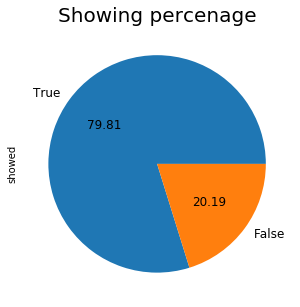

In [152]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# mask for who showed
showed = df['NoShow'] == 0
nshowed = df['NoShow'] == 1
df['showed'] = showed
df['notshowed'] = nshowed

# plot a pie chart to check the percentage of showing on an appointment
per = df['showed'].value_counts()
piechrt = per.plot.pie(figsize=(5,5), autopct='%.2f', fontsize = 12);
piechrt.set_title('Showing percenage', fontsize = 20);

#### Showing percentage figure conclude that, the percentage of showed patients got about 79.81% and 20.19% otherwise.

### Research Question 2  (what are the features that affect the status of showing ?)

Text(0, 0.5, 'Age')

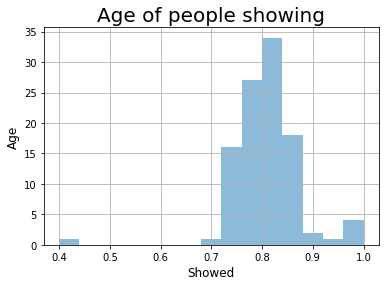

In [153]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# analyze age feature 
df.groupby('Age')['showed'].mean().hist(alpha=0.5,bins=15,label='show')
pltt.title("Age of people showing", fontsize=20)
pltt.xlabel("Showed", fontsize=12)
pltt.ylabel("Age", fontsize=12)

#### Age of people showed on appointments figure conclude that, the age that got the highest percentage of showing is 34 year old people, which got more than 80% of showing, also the age range from 16-27 got a reasonable percentage. but we can see that people under 15 had low percentage and I think the reason might be there's no adult to control the situation.

Gender
F    0.796854
M    0.800321
Name: showed, dtype: float64


Text(0, 0.5, 'Gender')

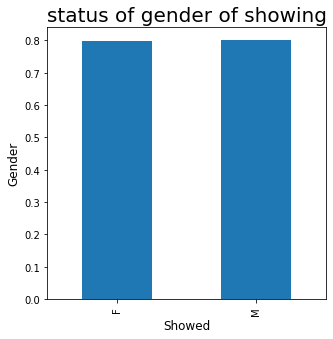

In [154]:
# analyze gender feature 
print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(5,5));
pltt.title("status of gender of showing", fontsize = 20)
pltt.xlabel("Showed", fontsize = 12)
pltt.ylabel("Gender", fontsize = 12)

#### Status of gender to people showed on appointments figure conclude that, there's no effects on the status of showing because both genders got the same percentage of about 80%.

SMS_received
0    0.832967
1    0.724255
Name: showed, dtype: float64


Text(0, 0.5, 'SMS recieved')

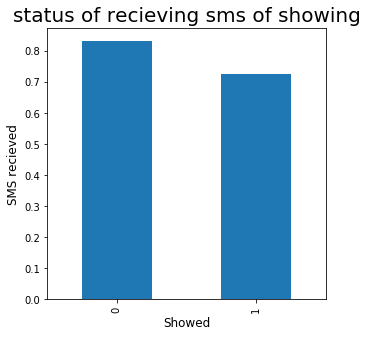

In [155]:
# analyze recieving sms feature 
print(df.groupby('SMS_received')['showed'].mean())
df.groupby('SMS_received')['showed'].mean().plot(kind='bar',figsize=(5,5));
pltt.title("status of recieving sms of showing", fontsize = 20)
pltt.xlabel("Showed", fontsize = 12)
pltt.ylabel("SMS recieved", fontsize = 12)

#### Status of recieving sms to people showed on appointments figure conclude that, people who recieved messages got lower percentage than others who didn't. therefore, the message didn't affect their status of showing.

Scholarship
0    0.801928
1    0.762637
Name: showed, dtype: float64


Text(0, 0.5, 'Scholarship')

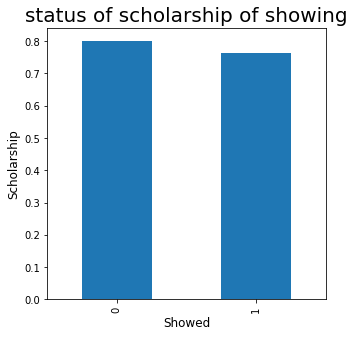

In [156]:
# analyze ascholarship feature 
print(df.groupby('Scholarship')['showed'].mean())
df.groupby('Scholarship')['showed'].mean().plot(kind = 'bar',figsize=(5,5))
pltt.title("status of scholarship of showing", fontsize = 20)
pltt.xlabel("Showed", fontsize = 12)
pltt.ylabel("Scholarship", fontsize = 12)

#### Status of scholarships for people showed on appointments figure conclude that, people who have scholarships got lower percentage than others who didn't.

Alcoholism
0    0.798054
1    0.798512
Name: showed, dtype: float64


Text(0, 0.5, 'Alcoholism')

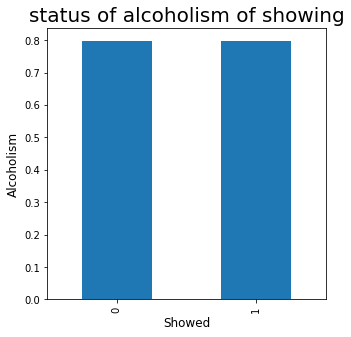

In [157]:
# analyze alcoholism feature 
print(df.groupby('Alcoholism')['showed'].mean())
df.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(5,5));
pltt.title("status of alcoholism of showing", fontsize = 20)
pltt.xlabel("Showed", fontsize = 12)
pltt.ylabel("Alcoholism", fontsize = 12)

#### Status of alcoholism for people showed on appointments figure conclude that, there's no effects on the status of showing because both results got the same percentage of about 80%.

<a id='conclusions'></a>
## Conclusions


# Limitations:
### There are some features that didn't need to be considered as it didn't affect the results. such as gender and alcoholism.

### There's more feature that can affect the status of showing,  Such as:
#### - Other responsibilties in life suddenly showed up. for example: trouble getting off work, child care or transportation issues.
#### - Finantial issues
#### - History of failed appointments 

### Also, I think a long waiting time might affect the status of showing on an appointments. so the given data might help with these issues to decrease the percentage of no show.

# Some notes about the analyzed features:

#### - As 20.19% didn't show in their appointments, and that's a high percentage that must be decreased.

#### - As age is the most affecting factor, we can say they're must be an adult with children (age under 18) to help them with their appointments as they can forget or anything can affect their showing status.

#### - For SMS, about 83.30% who didn't recieve sms showed in the appointments, and about 72.43% who recieved sms showed. therfore sending sms to patients didn't increase the percantage of showing but I think it's a good reminder to alert the patients for ther appointments, as we saw most of the people maybe forget about their appointments.

#### - For scholarships, about 80.19% who doesn't have scholarships showed in their appointments, and about 76.26% who have scholarships showed. therefore, doesn't have a scholarship might increase the percentage of showing on an appointments.

#### - Regarding gender and alcoholism, these features can be removed as it didn't affect the status of showing.

